### MNIST Dataset

MNIST dataset is an image dataset containing 60,000 training and 10,000 testing images of hand-written digits from 0 to 9. As it only contains digits, it has 10 classes (0 to 9) and each with a corresponding label of that digit.<br>
Each image is 28x28 square pixel of 784 pixels in total. It is gray-scaled with no RGB parameters.<br>
<b><h5>Train Data Shape: </h5></b>
The shape of train image data is (60000, 28, 28). Means, 60,000 grayscale images with 28x28 shape and the label data shapoe is (60000,) as a vector.<br>
<h5><b>Test Data Shape: </b></h5>
The shape of test image data is (10000, 28, 28). Means, 10,000 grayscale images with 28x28 shape and the label data shapoe is (10000,) as a vector.<br>

<h4> What will we do in this project?</h4>
<pre>
1. Firstly, we will load the MNIST dataset from Keras.
2. Then, divide the test and train data from the dataset and normalize as we want.
3. After that, we will try to build the model using Keras Sequential neural network 
   architecture. For beginner level, this architecture offers broad parameters.
4. Then, we will compile the model with optimizer, loss function and metrics.
        For updating the weights during training we will use 'ada' optimizer, 
        for calculating loss 'sparse_categorical_crossentropy' loss function will be
        used and for evaluation purpose we wil take the 'accuracy' metrics.
5. After all that, we will be fit the model for training. Here we will take a part
   of the training data for the validation process. Also, we will be using a batch
   size for parallely processing images with GPU, epochs for iterating over the 
   model, and the validation split for splitting the training data into a training
   set and a validation set.
6. Finally, we will be evaluate the results with test data and make predictions
   from the test data, as well as with our own hand written data.
</pre>

<h4> How to set things up for it?</h4>

1. Create an environment for tensorflow with Miniconda.<br>
<code>conda create -n ``your_environment_name`` python=3.8</code>
<br><br>
2. Activate it and install tensorflow using any of the below:<br>
<p>With Miniconda- 
    <code>
    conda activate ``your_environment_name``
    conda install -c conda-forge tensorflow=2.7
</code>
    With Pip- 
    <code>
    pip install --upgrade pip
    pip install tensorflow==2.7 --user
</code>
</p><br>
3. After installing tensorflow, open a notebook and write the below code to check if <br>Tensorflow is working or not-<br>
<code>import tensorflow as tf
    print(f"Tensorflow Version : {tf. _ _ version _ _ }")</code>
    <pre>Tensorflow Version : 2.7.0 </pre>
<br>
4. If it is working, now we can download the MNIST dataset and load it from cache.

<h5> What is expected from the project?</h5>

<h5> How to improve?</h5>

### Download MNIST dataset and load it

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(f"Tensorflow Version : {tf.__version__}")
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

Tensorflow Version : 2.7.0


The MNIST dataset will be loaded in two set of tuples. One is for the training data and another one is for testing data. Both of the data will contain an array of images and a vector for the lebels.<br>
After loading the datasets, we can show the shape of them as well.

In [2]:
# Load the mnist data.
(train_img, train_label), (test_img, test_label) = keras.datasets.mnist.load_data()

# Show shapes of both Train and Test data
print(f"X_Train Image Shape :{train_img.shape}\nY_Train Label Shape :{train_label.shape}")
print(f"\nX_Test Image Shape :{test_img.shape}\nY_Test Label Shape :{test_label.shape}")

X_Train Image Shape :(60000, 28, 28)
Y_Train Label Shape :(60000,)

X_Test Image Shape :(10000, 28, 28)
Y_Test Label Shape :(10000,)


### Display Images from the MNIST dataset

Text(0, 0.5, 'Label: 4')

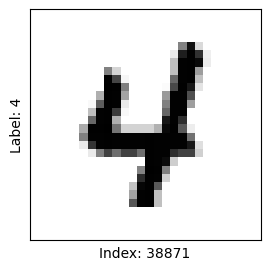

In [3]:
# Display image
plt.figure(figsize=(3, 3))
# select a random index number from 0 to 60000
i = random.randint(1, 60000)
plt.imshow(train_img[i], cmap='gray_r') # using cmap to show grayscale image and '_r' for reverse color

# to remove x and y axis labels
plt.xticks([])
plt.yticks([])

# show the index and image label as x and y label
plt.xlabel(f"Index: {i}")
plt.ylabel(f"Label: {train_label[i]}")

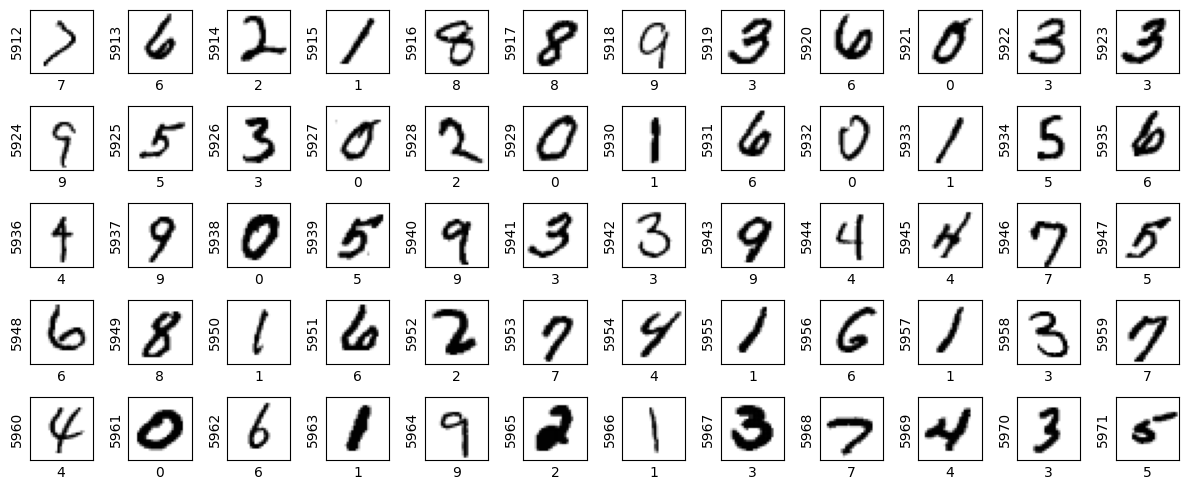

In [4]:
# This shows random 60 images sequentially from the train data with their label and index

Rows = 5
Cols = 12
i = 0
t = random.randint(1,59940)

plt.figure(figsize=(12,5))
for r in range(Rows):
    for c in range(Cols):
        plt.subplot(Rows, Cols, i+1)
        plt.imshow(train_img[t], cmap='gray_r')
        
        plt.xticks([])
        plt.yticks([])
        
        plt.xlabel(train_label[t])
        plt.ylabel(t)
        i += 1
        t += 1
        
plt.tight_layout()
plt.show() 

### Normalizing the Data

Normalizing data is not must, but it is recommended. Normalizing the data helps in many ways and keeps the data suitable for further improvement. Such as - It improves the convergence of of data more fast, gradient descent performs well under normalized scale, the sensitivity improves while applying any regularization, and many more.<br><br>
In our case, we will be ranging the image intensity from 0 to 255 into 0 to 1. Regularizing the pixel intensity into 0 to 1 range will be good enough for this project.

The Image index is [4101] and the digit is: 3


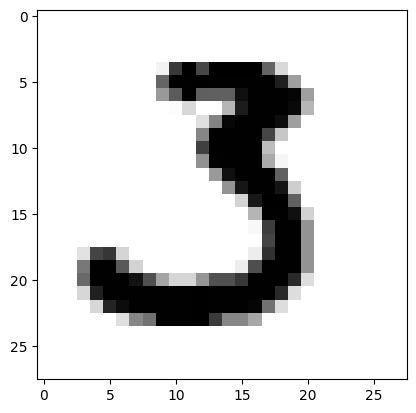

In [5]:
# normalize by dividing the highest range 255

train_img_norm = train_img.reshape(-1, 28*28).astype("float32") / 255.0 # Train data Normalized
test_img_norm = test_img.reshape(-1, 28*28).astype("float32") / 255.0  # Test image Normalized

# Now the train image became a vector. Vector cannot be showed as image. So for showing the
# normalized data, we always need to reshape it to an array. Lets have a look-
num = random.randint(0,60000)
plt.imshow(train_img_norm[num].reshape(28, 28), cmap='gray_r')
print(f"The Image index is [{num}] and the digit is: {train_label[num]}")

### Building the Model
Here we will first use the Sequential neural network architecture using keras. We will add one input layer, and two hidden layer and lastly one output layer. For each hidden layer, we will use the most common <b>'ReLU'</b> activation function, and for the output layer we must need to use the <b>'Softmax'</b> activation function as it is a multi-class classification model.

In [6]:
model = keras.Sequential([
    keras.Input(shape = 28*28), # the input layer will recieve 28x28 pixel grayscale images
    layers.Dense(units = 256, activation='relu'),   # Hidden Layer-1 with 256 neurons
    layers.Dense(units = 64, activation='relu'),    # Hidden Layer-2 with 64 neurons
    layers.Dense(units = 10, activation='softmax'), # Output layer with 10 neuron for 10 classes (0-9)
])
# Show the summary of the network of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


### Compile the Model
Just before we train the model, we need to compile it with <b>'Compile''</b> method from Keras to configure the learning process. In short, we need to set the model how it should learn. We will be using the below three processes:
<h5> ⦁ `optimizer`</h5>
<p>This argument specifies the optimization algorithm used to update the model's weights during training. We will be using the 'adam' optimization algorithm for that. Adam adapts the learning rates of individual parameters based on the past gradients, making it more efficient in many cases.</p>
<h5> ⦁ `loss` </h5>
<p>This argument specifies the loss function that the model aims to minimize during training. The loss function quantifies the difference between the predicted values and the true labels. We will be using the <b>'sparse_categorical_crossentropy'</b> which is a specific type of loss function suitable for multiclass classification problems with integer class labels. </p>
<h5> ⦁ `metrics` </h5>
<p>This argument is a list of evaluation metrics used to monitor the model's performance during training. For this project, we will be using only the 'accuracy' metrics. It calculates the accuracy rate, which is the proportion of correct predictions over the total number of samples.</p>

In [7]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

### Training the Model
Finally, here we will be fitting our model to train and use some specific arguments for the process.<br>
`> x: is for training images as inputs`<br>
`> y: is for labeling images as outputs`<br>
`> epochs: for the total iteration over the model`<br>
`> batch_size: for parallelly computing the samples at a time.`<br>
`> validation_split: for splitting the training data into a training set and a validation set`<br>

In [8]:
fits = model.fit(
    x = train_img_norm, 
    y = train_label, 
    epochs = 10, 
    batch_size = 85,
    validation_split = 0.20
)

Epoch 1/10
565/565 [==============================] - 2s 3ms/step - loss: 0.2860 - accuracy: 0.9172 - val_loss: 0.1365 - val_accuracy: 0.9618
Epoch 2/10
565/565 [==============================] - 1s 2ms/step - loss: 0.1084 - accuracy: 0.9681 - val_loss: 0.1050 - val_accuracy: 0.9683
Epoch 3/10
565/565 [==============================] - 1s 2ms/step - loss: 0.0696 - accuracy: 0.9788 - val_loss: 0.0903 - val_accuracy: 0.9731
Epoch 4/10
565/565 [==============================] - 1s 2ms/step - loss: 0.0492 - accuracy: 0.9842 - val_loss: 0.0894 - val_accuracy: 0.9739
Epoch 5/10
565/565 [==============================] - 1s 2ms/step - loss: 0.0373 - accuracy: 0.9880 - val_loss: 0.0957 - val_accuracy: 0.9730
Epoch 6/10
565/565 [==============================] - 1s 2ms/step - loss: 0.0272 - accuracy: 0.9911 - val_loss: 0.0894 - val_accuracy: 0.9752
Epoch 7/10
565/565 [==============================] - 1s 2ms/step - loss: 0.0200 - accuracy: 0.9939 - val_loss: 0.0889 - val_accuracy: 0.9763
Epoch 

### Plotting the Model training Results

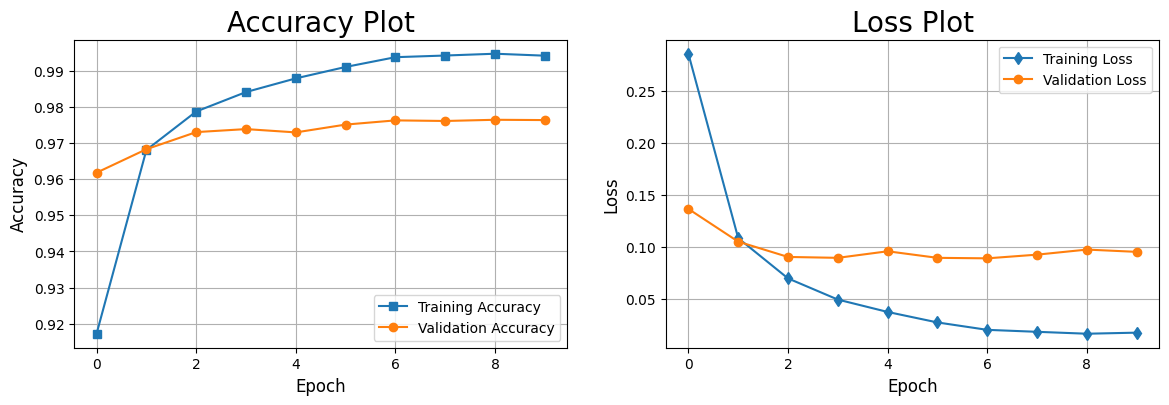

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.title("Accuracy Plot", size = 20)
plt.plot(fits.history['accuracy'], 's-', label='Training Accuracy')
plt.plot(fits.history['val_accuracy'], 'o-', label = 'Validation Accuracy')
plt.xlabel('Epoch', size = 12)
plt.ylabel('Accuracy', size = 12)
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.title("Loss Plot", size = 20)
plt.plot(fits.history['loss'], 'd-', label='Training Loss')
plt.plot(fits.history['val_loss'], 'o-', label='Validation Loss')
plt.xlabel('Epoch', size = 12)
plt.ylabel('Loss', size = 12)
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

### Evaluation on Test Data

In [10]:
test_loss, test_acc = model.evaluate(test_img_norm, test_label)
# Print test results
print('\nTest Accuracy\t: {:.4f} %'.format(test_acc * 100))
print('Test Loss\t: {:.4f} %'.format(test_loss * 100))

313/313 [==============================] - 0s 2ms/step - loss: 0.0857 - accuracy: 0.9788

Test Accuracy	: 97.8800 %
Test Loss	: 8.5681 %


### Making predictions on entire test image

In [11]:
predictions = model.predict(test_img_norm)

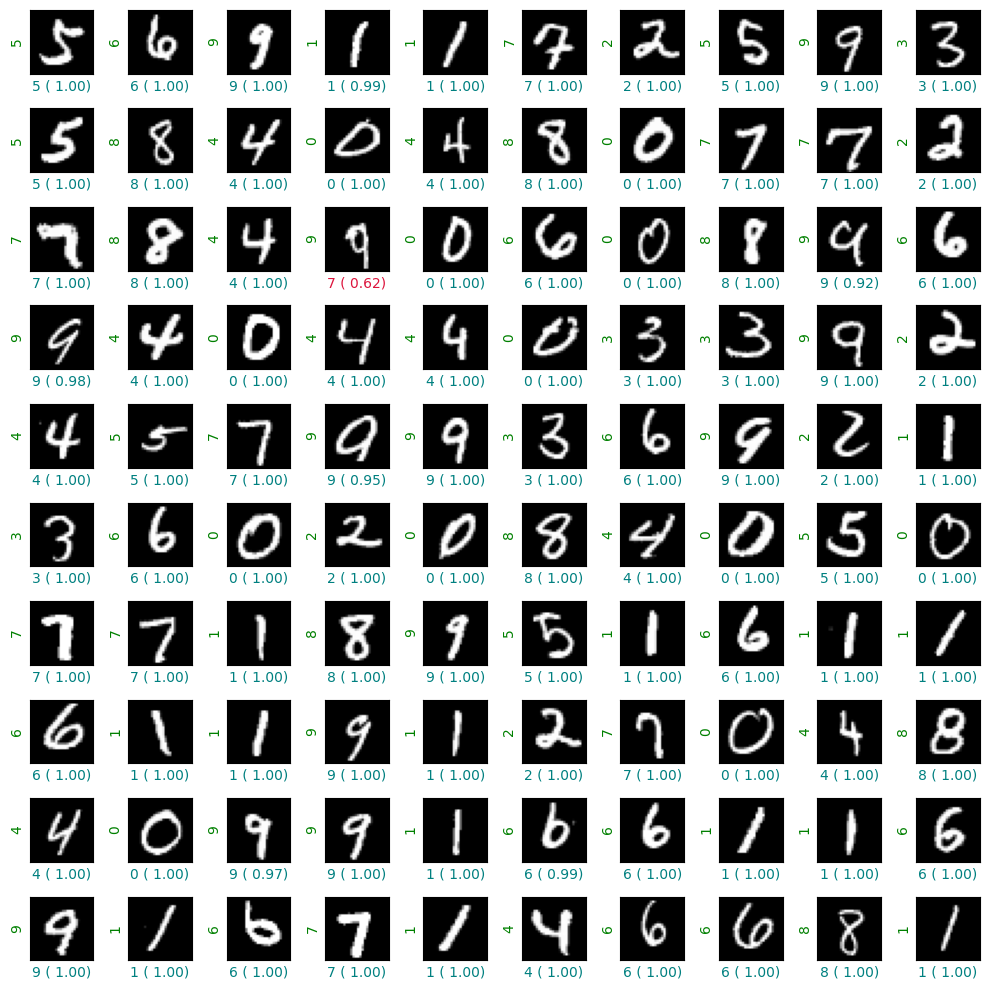

In [12]:
ROWS = 10
COLS = 10

random_indices = random.sample(range(test_img_norm.shape[0]), ROWS*COLS)
sample_images = test_img_norm[random_indices, :]
sample_labels = test_label[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(10,10))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='teal')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='crimson')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

### Predict Unseen data, self-written digits

I have made 10 image files with 28x28 pixel with the 10 digits. Now, I will evaluate the model using this 10 unseen images and see if it can predict correctly.<br><br>
First, we will read the images and turne them into a numpy array-

In [13]:
import cv2

# Step 1: Read the image files, create a numpy array, and create a vector for labels
image_folder = "C:/Users/MUBASHIR MOHSIN/OneDrive - American International University-Bangladesh/MAJOR/Computer Vision/Learning/Digits"
image_files = os.listdir(image_folder)
unseen_img = []
unseen_labels = []

for file in image_files:
    image_path = os.path.join(image_folder, file)
    label = int(file.split(".")[0])  # Extract the label from the file name
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # Convert into gray scale
    unseen_img.append(image)
    unseen_labels.append(label)

unseen_img = np.array(unseen_img)
unseen_labels = np.array(unseen_labels)

print(f"Unseen Image Shape: {unseen_img.shape}\nUnseen Labels Shape: {unseen_labels.shape}")

Unseen Image Shape: (10, 28, 28)
Unseen Labels Shape: (10,)


In [14]:
# Step 2: Normalize the images to values between 0 and 1
unseen_img_norm = unseen_img.reshape(-1, 28*28).astype("float32") / 255.0

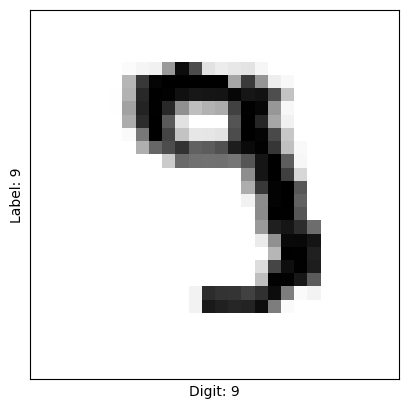

In [15]:
# Show Image from the array
i = 9
plt.imshow(unseen_img[i].reshape(28,28), cmap = 'gray')
plt.xlabel(f"Digit: {i}")
plt.ylabel(f"Label: {unseen_labels[i]}")
plt.xticks([])
plt.yticks([])
plt.show()

In [16]:
# Step 3: Evaluate your model with the normalized images and labels
unseen_loss, unseen_acc = model.evaluate(unseen_img_norm, unseen_labels)

# Step 4: Print the test results
print("Test Accuracy\t:", unseen_acc)
print("Test Loss\t:", unseen_loss)

1/1 [==============================] - 0s 106ms/step - loss: 39.8419 - accuracy: 0.1000
Test Accuracy	: 0.10000000149011612
Test Loss	: 39.84187316894531


### Unseen Prediction

In [17]:
Unseen_pred = model.predict(unseen_img_norm)

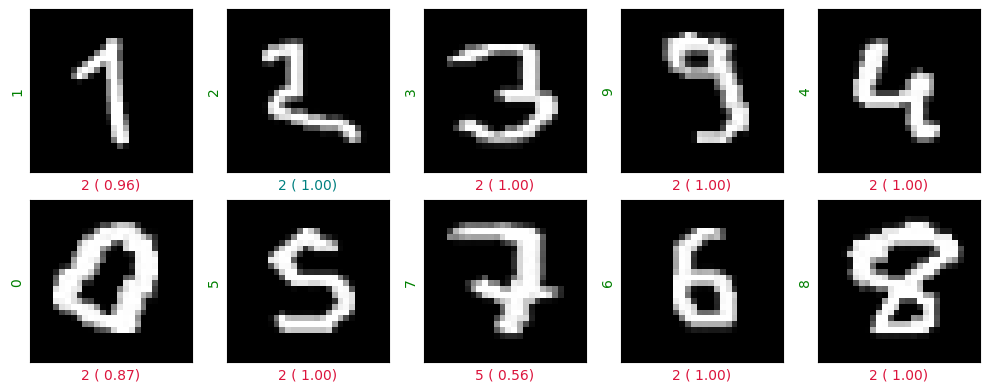

In [18]:
ROWS = 2
COLS = 5

random_indices = random.sample(range(unseen_img_norm.shape[0]), ROWS*COLS)
sample_images = unseen_img_norm[random_indices, :]
sample_labels = unseen_labels[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(10,4))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='teal')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='crimson')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

### Predict a single image

In [19]:
def test(i):
    img = unseen_img_norm[i]
    predictions = model.predict([img.reshape(-1,784)])

    plt.figure(figsize=(2,2))
    plt.imshow(img.reshape(28,28), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])

    plt.ylabel(f"True Label: {unseen_labels[i]}", color='g') # ground truth

    prediction = np.argmax(predictions) 
    confidence = predictions[0][prediction]

    if unseen_labels[i] == prediction:
        plt.xlabel(f"Predicted = {prediction}\n(Confidence Score = {confidence: .2f})", color='b')
    else:
        plt.xlabel(f"Predicted = {prediction}\n(Confidence Score = {confidence: .2f})", color='r')
    plt.show()

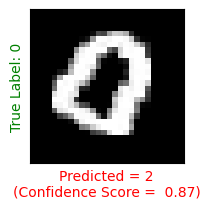

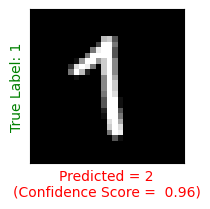

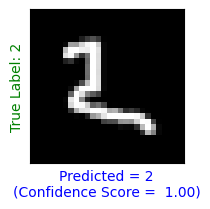

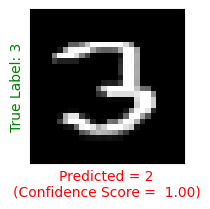

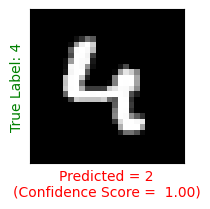

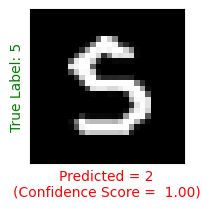

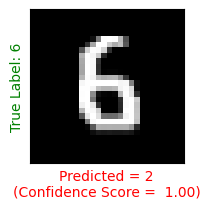

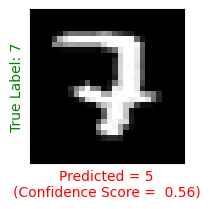

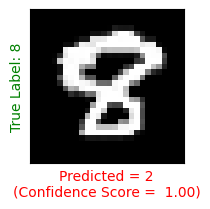

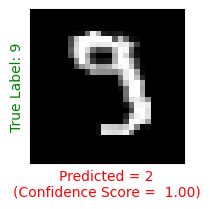

Correctly Predictied	: 1 unseen image/s
Incorrectly Predictied	: 9 unseen image/s
Accuracy		: 0.1	 | 1 out of 10


In [20]:
cor = 0
incor = 0

for i in range(0,10):
    test(i)
    if prediction == unseen_labels[i]:
        cor += 1
    else:
        incor += 1

print(f"Correctly Predictied\t: {cor} unseen image/s")
print(f"Incorrectly Predictied\t: {incor} unseen image/s")
acc = cor /(cor+incor)
print(f"Accuracy\t\t: {acc}\t | {cor} out of {cor+incor}")

## Discussion

The accuracy of training data, testing data looks very good and compelling. But when we tested it with unseen data, self-written digits on 28x28 images, it shows very poor results. Only 1 out of the 10 digits it predicted correctly. Which is a very poor result after training it with 60,000 images. This is not expected, and the model building didn't help. However, this is very common and often we get this poor results with unseen data. Because, the model we built is an Artificial Neural Network (ANN), a simple neural network. But if we use Convolutional Neural Network (CNN), this result with unseen data will improve.